# 1. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [ ]:
df_raw = pd.read_csv("./data/raw/TikiNow_DA_Test.csv")
df_raw.head()

C:\Users\OS\AppData\Local\Temp\ipykernel_26368\458119043.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("TikiNow_DA_Test.csv")


,order_id,order_value,total_units_order,fulfillment_type,order_type,status,departure_province,departure_region,destination_province,destination_region,...,create_at,delivery_deadline,fulfill_at,pack_at,pickup_at,transfer_to_sort_at,deliver_at,cancel_at,failed_delivery,cancel_reason
0,1.0,29000.0,1.0,dropship,NORMAL,giao_hang_thanh_cong,Hồ Chí Minh,Miền Nam,Bà Rịa - Vũng Tàu,Miền Nam,...,2022-03-28 21:25:19 UTC,2022-04-02 23:59:59 UTC,NaN,NaN,2022-03-29 11:13:02.052 UTC,2022-03-29 12:31:41.106 UTC,2022-03-30 11:32:33.188 UTC,NaN,False,NaN
1,2.0,123500.0,1.0,dropship,NORMAL,canceled,Hồ Chí Minh,Miền Nam,Kiên Giang,Miền Nam,...,2022-04-25 07:27:01 UTC,2022-05-02 23:59:59 UTC,NaN,NaN,NaN,NaN,NaN,2022-04-27 07:36:42 UTC,False,PO Late/Not Confirmed By Seller
2,3.0,109000.0,1.0,dropship,NORMAL,canceled,Hồ Chí Minh,Miền Nam,Hồ Chí Minh,Miền Nam,...,2022-03-17 11:40:29 UTC,2022-03-23 23:59:59 UTC,NaN,NaN,NaN,NaN,NaN,2022-03-17 15:56:43 UTC,False,All
3,4.0,219000.0,1.0,instock,SAME DAY,giao_hang_thanh_cong,Hồ Chí Minh,Miền Nam,Hồ Chí Minh,Miền Nam,...,2022-04-03 20:31:12 UTC,2022-04-04 11:59:59 UTC,2022-04-03 20:36:30 UTC,2022-04-03 23:48:14 UTC,NaN,2022-04-03 23:49:21.43 UTC,2022-04-04 09:12:57.836 UTC,NaN,False,NaN
4,5.0,42999.0,1.0,dropship,NORMAL,giao_hang_thanh_cong,Hà Nội,Miền Bắc,Đồng Nai,Miền Nam,...,2022-06-23 10:57:13 UTC,2022-06-29 23:59:59 UTC,NaN,NaN,2022-06-24 13:26:34.63 UTC,2022-06-24 13:26:33.868 UTC,2022-06-29 09:26:58.298 UTC,NaN,False,NaN


In [3]:
df_raw.shape

(800001, 22)

In [4]:
df_raw.columns

Index(['order_id', 'order_value', 'total_units_order', 'fulfillment_type',
       'order_type', 'status', 'departure_province', 'departure_region',
       'destination_province', 'destination_region', 'warehouse', 'partner',
       'create_at', 'delivery_deadline', 'fulfill_at', 'pack_at', 'pickup_at',
       'transfer_to_sort_at', 'deliver_at', 'cancel_at', 'failed_delivery',
       'cancel_reason'],
      dtype='object')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800001 entries, 0 to 800000
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              799999 non-null  float64
 1   order_value           800001 non-null  float64
 2   total_units_order     800000 non-null  float64
 3   fulfillment_type      800000 non-null  object 
 4   order_type            800000 non-null  object 
 5   status                800000 non-null  object 
 6   departure_province    800000 non-null  object 
 7   departure_region      800000 non-null  object 
 8   destination_province  800000 non-null  object 
 9   destination_region    800000 non-null  object 
 10  warehouse             800000 non-null  float64
 11  partner               668971 non-null  object 
 12  create_at             800000 non-null  object 
 13  delivery_deadline     800000 non-null  object 
 14  fulfill_at            344915 non-null  object 
 15  

# 2. Data Cleaning

Standardize data type

Datetime columns conversion to Vietnam timezone

In [6]:
time_cols = ['create_at', 'delivery_deadline', 'fulfill_at', 'pack_at', 'pickup_at', 'transfer_to_sort_at', 'deliver_at', 'cancel_at']
for col in time_cols:
    s = df_raw[col].astype("string").str.strip()
    s = s.str.replace(r"\s(UTC|GMT)$", "+00:00", regex=True)
    ts_utc = pd.to_datetime(s, utc=True, format="mixed")
    df_raw[col] = ts_utc.dt.tz_convert("Asia/Ho_Chi_Minh")


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800001 entries, 0 to 800000
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype                           
---  ------                --------------   -----                           
 0   order_id              799999 non-null  float64                         
 1   order_value           800001 non-null  float64                         
 2   total_units_order     800000 non-null  float64                         
 3   fulfillment_type      800000 non-null  object                          
 4   order_type            800000 non-null  object                          
 5   status                800000 non-null  object                          
 6   departure_province    800000 non-null  object                          
 7   departure_region      800000 non-null  object                          
 8   destination_province  800000 non-null  object                          
 9   destination_region    800000 non-null

## 2.1. Missing Value

In [8]:
missing=df_raw.isnull().sum()
missing

order_id                     2
order_value                  0
total_units_order            1
fulfillment_type             1
order_type                   1
status                       1
departure_province           1
departure_region             1
destination_province         1
destination_region           1
warehouse                    1
partner                 131030
create_at                    1
delivery_deadline            1
fulfill_at              455086
pack_at                 475025
pickup_at               456860
transfer_to_sort_at     168232
deliver_at              167379
cancel_at               632627
failed_delivery              1
cancel_reason           632626
dtype: int64

In [9]:
missing_rate = df_raw.isnull().mean().sort_values(ascending=False)
missing_rate

cancel_at               0.790783
cancel_reason           0.790782
pack_at                 0.593781
pickup_at               0.571074
fulfill_at              0.568857
transfer_to_sort_at     0.210290
deliver_at              0.209223
partner                 0.163787
order_id                0.000002
delivery_deadline       0.000001
total_units_order       0.000001
status                  0.000001
fulfillment_type        0.000001
order_type              0.000001
departure_region        0.000001
create_at               0.000001
warehouse               0.000001
destination_region      0.000001
departure_province      0.000001
destination_province    0.000001
failed_delivery         0.000001
order_value             0.000000
dtype: float64

In [10]:
high_missing_cols = missing_rate[missing_rate > 0.3].index
high_missing_cols

Index(['cancel_at', 'cancel_reason', 'pack_at', 'pickup_at', 'fulfill_at'], dtype='object')

## 2.2. Outliers value

In [11]:
df_raw.describe()

,order_id,order_value,total_units_order,warehouse
count,799999.000000,8.000010e+05,800000.000000,800000.000000
mean,400000.460541,3.971802e+05,2.095401,2.280416
std,230940.393654,1.960997e+06,7.278119,1.291277
min,1.000000,-1.100000e+06,1.000000,1.000000
25%,200000.500000,8.200000e+04,1.000000,1.000000
50%,400000.000000,1.690000e+05,1.000000,2.000000
75%,600000.500000,3.390000e+05,2.000000,3.000000
max,800000.000000,6.200000e+08,2034.000000,6.000000


<Axes: >

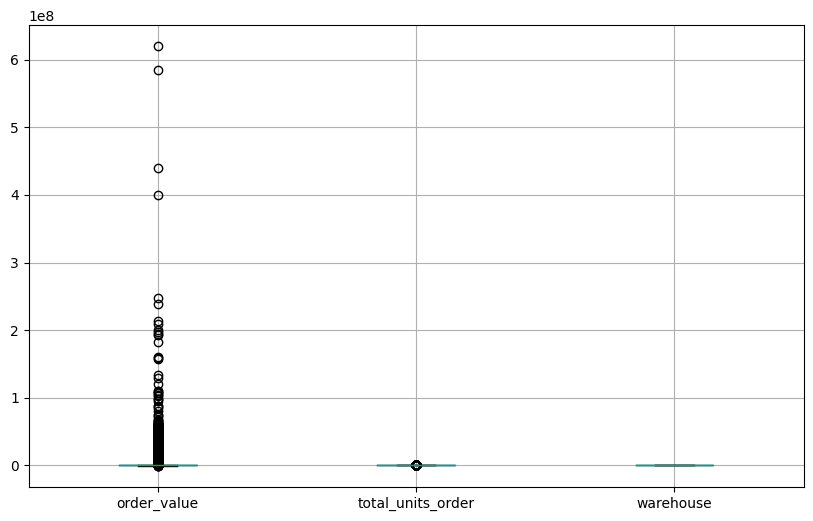

In [12]:
boxplot_cols = ['order_value', 'total_units_order', 'warehouse']
df_raw[boxplot_cols].boxplot(figsize=(10, 6))

## 2.3. Error data label

In [13]:
df_raw['status'].unique()

array(['giao_hang_thanh_cong', 'canceled', 'complete', nan], dtype=object)

In [14]:
df_raw["has_deliver_at"] = df_raw["deliver_at"].notna()
status_deliver_check = (
    df_raw.groupby("status")
      .agg(
          total_orders=("order_id", "count"),
          delivered_cnt=("has_deliver_at", "sum"),
          delivered_rate=("has_deliver_at", "mean")
      )
      .reset_index()
)
status_deliver_check

,status,total_orders,delivered_cnt,delivered_rate
0,canceled,167323,8,0.000048
1,complete,7,7,1.000000
2,giao_hang_thanh_cong,632669,632607,0.999900


Chuyển complete thành giao_hang_thanh_cong

In [15]:
df_raw['status'] = df_raw['status'].replace({'completed': 'giao_hang_thanh_cong'})

In [16]:
df_raw['status'] = df_raw['status'].replace({'giao_hang_thanh_cong': 'delivered'})

## 2.4. Logical error

In [17]:
df = df_raw.copy()

def _to_dt_utc(s):
    if not pd.api.types.is_datetime64_any_dtype(s):
        s = pd.to_datetime(s, utc=True, errors="coerce")
    # nếu là naive, localize UTC
    if getattr(getattr(s, "dt", None), "tz", None) is None:
        s = s.dt.tz_localize("UTC")
    return s

time_cols = ["create_at","delivery_deadline","fulfill_at","pack_at","pickup_at",
             "transfer_to_sort_at","deliver_at","cancel_at"]
for c in time_cols:
    df[c] = _to_dt_utc(df[c])

df["has_attempt"]  = ((~df["pickup_at"].isna()) | (~df["transfer_to_sort_at"].isna())).astype(int)
df["is_delivered"] = (~df["deliver_at"].isna()).astype(int)
df["cancel_type"] = np.select(
    [
        df["cancel_at"].isna(),
        df["cancel_at"].notna() & (df["has_attempt"]==0) & (df["is_delivered"]==0),
        df["cancel_at"].notna() & (df["has_attempt"]==1) & (df["is_delivered"]==0),
        df["cancel_at"].notna() & (df["is_delivered"]==1),
    ],
    [
        "ACTIVE_OR_COMPLETED",
        "CANCELLED_BEFORE_ATTEMPT",
        "CANCELLED_IN_TRANSIT",
        "CANCEL_AFTER_DELIVERY",
    ],
    default="UNKNOWN"
)

check1 = (df[df["cancel_at"].notna()]
          .groupby(["cancel_type","failed_delivery"], dropna=False)
          .size().reset_index(name="n")
          .sort_values(["cancel_type","failed_delivery"]))
print(check1.head(20))

suspicious = df[
    (df["cancel_type"]=="CANCELLED_IN_TRANSIT") &
    (df["failed_delivery"]==False)
].head(100)
print(suspicious)

cancel_after_delivery = df[
    df["cancel_type"]=="CANCEL_AFTER_DELIVERY"
].head(100)
print(cancel_after_delivery)

def violates_order(r):
    seq = ["create_at","fulfill_at","pack_at","pickup_at","transfer_to_sort_at","deliver_at"]
    prev = None
    for col in seq:
        t = r[col]
        if pd.isna(t): 
            continue
        if prev is not None and t < prev:
            return True
        prev = t
    if pd.notna(r["cancel_at"]) and pd.notna(r["create_at"]) and r["cancel_at"] < r["create_at"]:
        return True
    return False

df["bad_ordering"] = df.apply(violates_order, axis=1)
print("bad_ordering rows:", int(df["bad_ordering"].sum()))


                cancel_type  failed_delivery       n
0  CANCELLED_BEFORE_ATTEMPT            False  130423
1  CANCELLED_BEFORE_ATTEMPT             True      20
2      CANCELLED_IN_TRANSIT            False    4779
3      CANCELLED_IN_TRANSIT             True   32121
4     CANCEL_AFTER_DELIVERY            False      31
       order_id  order_value  total_units_order fulfillment_type order_type  \
109       110.0     147915.0                4.0         dropship     NORMAL   
806       807.0     339000.0                1.0         dropship     NORMAL   
825       826.0     179000.0                1.0         dropship     NORMAL   
1296     1297.0     298000.0                1.0         dropship     NORMAL   
1303     1304.0     240000.0                2.0         dropship     NORMAL   
...         ...          ...                ...              ...        ...   
15093   15094.0    1297000.0               10.0          instock     NORMAL   
15598   15599.0     177898.0                2.0   

In [ ]:
df.to_csv("./data/clean/TikiNow_DA_Test_Prepared.csv", index=False)

In [ ]:
late_orders_count = df[(df['deliver_at'] > df['delivery_deadline']) & (df['is_delivered'] == 1)].shape[0]
print(f"Number of late orders: {late_orders_count}")

Number of late orders: 30288
